## Derivative Pricing :-

In [1]:
import math

def black_scholes_option_price(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    Parameters:
    S (float): Current stock price
    K (float): Option strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying stock
    option_type (str): 'call' for call option, 'put' for put option

    Returns:
    float: Option price
    """

    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        option_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    elif option_type == 'put':
        option_price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

def norm_cdf(x):
    """Calculate the cumulative distribution function of the standard normal distribution."""
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

In [2]:
# Example usage:
S = 100.0  # Current stock price
K = 100.0  # Option strike price
T = 5.0    # Time to expiration in years
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

call_price = black_scholes_option_price(S, K, T, r, sigma, option_type='call')
put_price = black_scholes_option_price(S, K, T, r, sigma, option_type='put')

print(f"Black-Scholes Call Option Price: {call_price:.2f}")
print(f"Black-Scholes Put Option Price: {put_price:.2f}")

Black-Scholes Call Option Price: 29.14
Black-Scholes Put Option Price: 7.02


In [3]:
import math

def binomial_option_price(S, K, T, r, sigma, option_type='call', n=1000):
    """
    Calculate the option price using the binomial option pricing model.

    Parameters:
    S (float): Current stock price
    K (float): Option strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying stock
    option_type (str): 'call' for call option, 'put' for put option
    n (int): Number of time steps in the binomial model

    Returns:
    float: Option price
    """
    dt = T / n
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)

    option_prices = [[0 for _ in range(n + 1)] for _ in range(n + 1)]

    # Calculate option prices at expiration
    for j in range(n + 1):
        if option_type == 'call':
            option_prices[n][j] = max(0, S * (u**j) * (d**(n - j)) - K)
        elif option_type == 'put':
            option_prices[n][j] = max(0, K - S * (u**j) * (d**(n - j)))

    # Calculate option prices at earlier time steps
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            if option_type == 'call':
                option_prices[i][j] = max(0, math.exp(-r * dt) * (p * option_prices[i + 1][j + 1] + (1 - p) * option_prices[i + 1][j]))
            elif option_type == 'put':
                option_prices[i][j] = max(0, math.exp(-r * dt) * (p * option_prices[i + 1][j + 1] + (1 - p) * option_prices[i + 1][j]))

    return option_prices[0][0]

# Example usage:
S = 100.0  # Current stock price
K = 100.0  # Option strike price
T = 5.0    # Time to expiration in years
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

call_price = binomial_option_price(S, K, T, r, sigma, option_type='call')
put_price = binomial_option_price(S, K, T, r, sigma, option_type='put')

print(f"Binomial Call Option Price: {call_price:.2f}")
print(f"Binomial Put Option Price: {put_price:.2f}")

Binomial Call Option Price: 29.13
Binomial Put Option Price: 7.01


In [4]:
#DELTA

import math

def black_scholes_delta(S, K, T, r, sigma):
    """
    Calculate the delta of a call option using the Black-Scholes model.

    Parameters:
    S (float): Current stock price
    K (float): Option strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying stock

    Returns:
    float: Delta of the call option
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    delta = math.exp(-r * T) * norm_cdf(d1)

    return delta

def norm_cdf(x):
    """Calculate the cumulative distribution function of the standard normal distribution."""
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

# Example usage:
S = 100.0  # Current stock price
K = 100.0  # Option strike price
T = 1.0    # Time to expiration in years
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

call_delta = black_scholes_delta(S, K, T, r, sigma)

print(f"Black-Scholes Call Option Delta: {call_delta:.4f}")

Black-Scholes Call Option Delta: 0.6058


In [5]:
#GAMMA

import math

def black_scholes_gamma(S, K, T, r, sigma):
    """
    Calculate the gamma of a call option using the Black-Scholes model.

    Parameters:
    S (float): Current stock price
    K (float): Option strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying stock

    Returns:
    float: Gamma of the call option
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    gamma = norm_pdf(d1) / (S * sigma * math.sqrt(T))

    return gamma

def norm_pdf(x):
    """Calculate the probability density function of the standard normal distribution."""
    return math.exp(-0.5 * x**2) / math.sqrt(2 * math.pi)

# Example usage:
S = 100.0  # Current stock price
K = 100.0  # Option strike price
T = 1.0    # Time to expiration in years
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

call_gamma = black_scholes_gamma(S, K, T, r, sigma)

print(f"Black-Scholes Call Option Gamma: {call_gamma:.4f}")

Black-Scholes Call Option Gamma: 0.0188


In [6]:
# THETA

import math

def black_scholes_theta(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the theta of a call option using the Black-Scholes model.

    Parameters:
    S (float): Current stock price
    K (float): Option strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying stock
    option_type (str): 'call' for call option, 'put' for put option

    Returns:
    float: Theta of the option
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        theta = -(S * norm_cdf(d1) * sigma) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm_cdf(d2)
    elif option_type == 'put':
        theta = -(S * norm_cdf(d1) * sigma) / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * norm_cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return theta

def norm_cdf(x):
    """Calculate the cumulative distribution function of the standard normal distribution."""
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

# Example usage:
S = 100.0  # Current stock price
K = 100.0  # Option strike price
T = 1.0    # Time to expiration in years
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

call_theta = black_scholes_theta(S, K, T, r, sigma, option_type='call')
put_theta = black_scholes_theta(S, K, T, r, sigma, option_type='put')

print(f"Black-Scholes Call Option Theta: {call_theta:.4f}")
print(f"Black-Scholes Put Option Theta: {put_theta:.4f}")

Black-Scholes Call Option Theta: -9.0299
Black-Scholes Put Option Theta: -4.2738


In [7]:
#IMPLIED VOLATILITY

from scipy.stats import norm
from scipy.optimize import newton

def black_scholes_call_price(S, K, T, r, sigma):
    """Calculate the Black-Scholes call option price."""
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility(option_price, S, K, T, r, initial_guess=0.2):
    """Calculate implied volatility using the Newton-Raphson method."""
    def f(sigma, option_price, S, K, T, r):
        return black_scholes_call_price(S, K, T, r, sigma) - option_price

    def f_prime(sigma, option_price, S, K, T, r):
        d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
        return S * norm.pdf(d1) * math.sqrt(T)

    implied_vol = newton(f, initial_guess, f_prime, args=(option_price, S, K, T, r))
    return implied_vol

# Example usage:
S = 100.0  # Current stock price
K = 100.0  # Option strike price
T = 1.0    # Time to expiration in years
r = 0.05   # Risk-free interest rate
option_price = 100.0  # Replace this with the actual market price of the option

implied_vol = implied_volatility(option_price, S, K, T, r)
print(f"Implied Volatility: {implied_vol:.4f}")

Implied Volatility: 16.7621


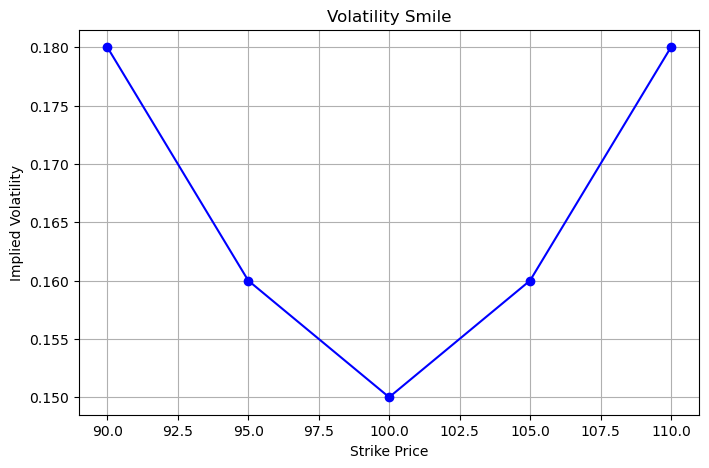

In [8]:
# VOLATILITY SMILE

import matplotlib.pyplot as plt
import numpy as np

# Sample data for implied volatility at different strike prices
strike_prices = np.array([90, 95, 100, 105, 110])
implied_volatilities = np.array([0.18, 0.16, 0.15, 0.16, 0.18])

# Plotting the volatility smile
plt.figure(figsize=(8, 5))
plt.plot(strike_prices, implied_volatilities, marker='o', linestyle='-', color='b')
plt.title('Volatility Smile')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.grid(True)
plt.show()

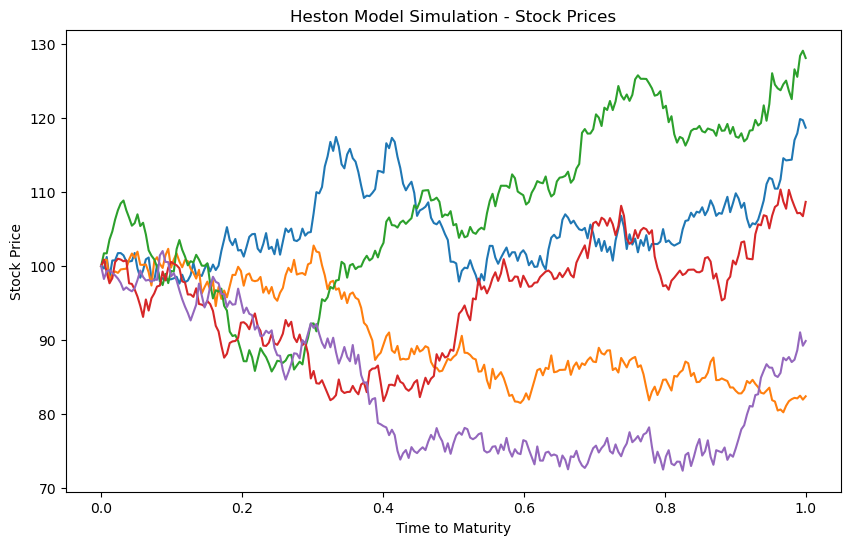

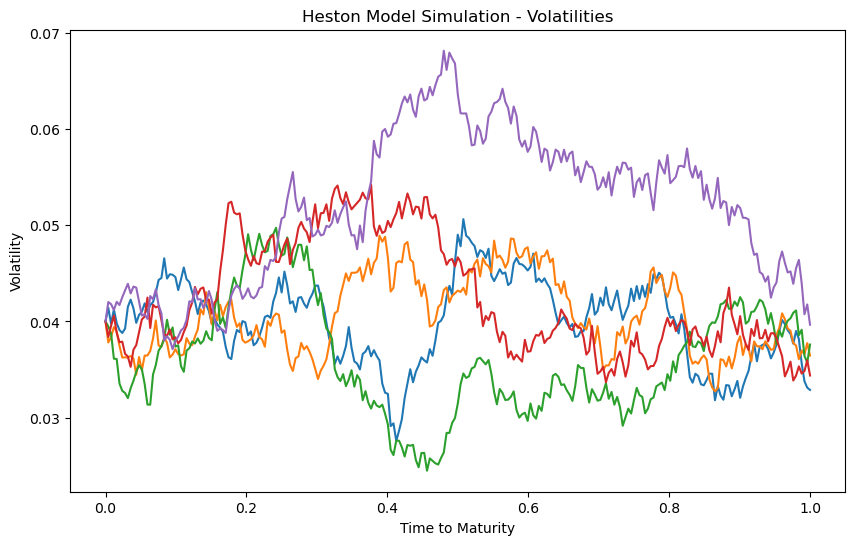

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def heston_model(S0, V0, r, kappa, theta, sigma, rho, T, N, M):
    dt = T / N
    sqrt_dt = np.sqrt(dt)

    S = np.zeros((M, N + 1))
    V = np.zeros((M, N + 1))

    S[:, 0] = S0
    V[:, 0] = V0

    for t in range(1, N + 1):
        Z_S = np.random.normal(0, 1, M)
        Z_V = rho * Z_S + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)

        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * V[:, t - 1]) * dt + np.sqrt(V[:, t - 1]) * sqrt_dt * Z_S)
        V[:, t] = np.maximum(0, V[:, t - 1] + kappa * (theta - V[:, t - 1]) * dt + sigma * np.sqrt(V[:, t - 1]) * sqrt_dt * Z_V)

    return S, V

# Parameters
S0 = 100.0      # Initial stock price
V0 = 0.04       # Initial volatility
r = 0.05        # Risk-free rate
kappa = 2.0     # Mean reversion speed
theta = 0.04    # Long-term average volatility
sigma = 0.1     # Volatility of volatility
rho = -0.7      # Correlation between asset price and volatility
T = 1.0         # Time to maturity
N = 252         # Number of time steps per year
M = 5           # Number of Monte Carlo simulations

# Simulate Heston model
stock_prices, volatilities = heston_model(S0, V0, r, kappa, theta, sigma, rho, T, N, M)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N + 1), stock_prices.T)
plt.title('Heston Model Simulation - Stock Prices')
plt.xlabel('Time to Maturity')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N + 1), volatilities.T)
plt.title('Heston Model Simulation - Volatilities')
plt.xlabel('Time to Maturity')
plt.ylabel('Volatility')
plt.show()

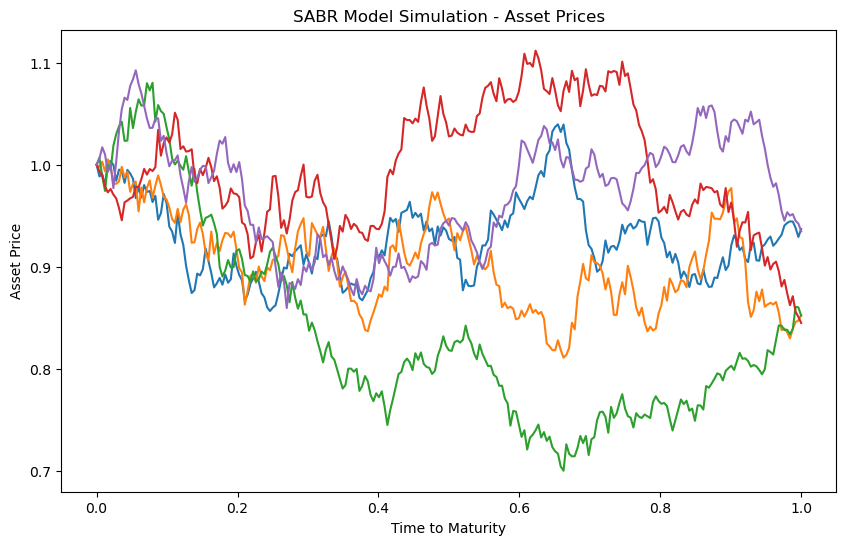

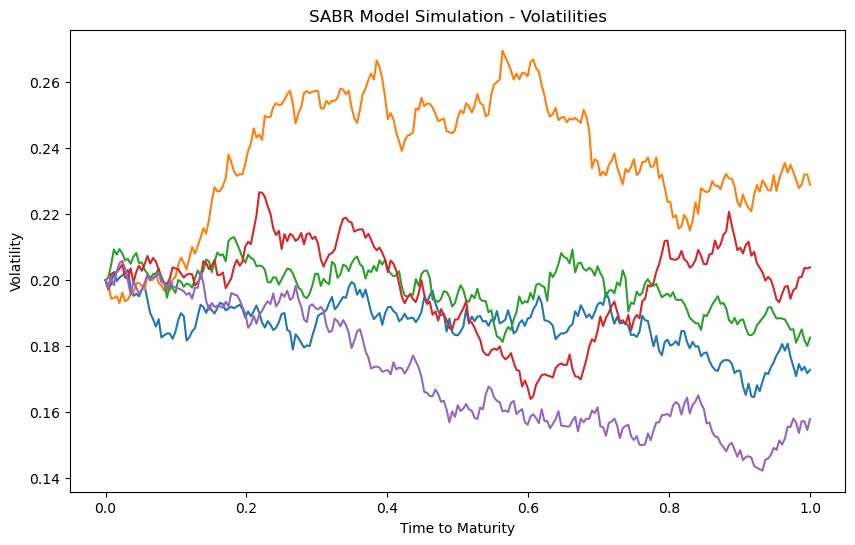

100.0

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sabr_model(alpha, beta, rho, T, N, M):
    dt = T / N
    sqrt_dt = np.sqrt(dt)

    S = np.zeros((M, N + 1))
    vol = np.zeros((M, N + 1))

    S[:, 0] = 1.0
    vol[:, 0] = alpha

    for t in range(1, N + 1):
        dW1 = np.random.normal(0, 1, M)
        dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)

        S[:, t] = S[:, t - 1] * np.exp(vol[:, t - 1] * dW1 * sqrt_dt - 0.5 * vol[:, t - 1]**2 * dt)
        vol[:, t] = vol[:, t - 1] + alpha * vol[:, t - 1] * dW2 * sqrt_dt

    return S, vol

# Parameters
alpha = 0.2  # Initial volatility
beta = 0.5   # Beta parameter
rho = -0.3   # Rho parameter
T = 1.0      # Time to maturity
N = 252      # Number of time steps per year
M = 5        # Number of Monte Carlo simulations

# Simulate SABR model
asset_prices, volatilities = sabr_model(alpha, beta, rho, T, N, M)

# Plot the results
time_grid = np.linspace(0, T, N + 1)

plt.figure(figsize=(10, 6))
plt.plot(time_grid, asset_prices.T)
plt.title('SABR Model Simulation - Asset Prices')
plt.xlabel('Time to Maturity')
plt.ylabel('Asset Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_grid, volatilities.T)
plt.title('SABR Model Simulation - Volatilities')
plt.xlabel('Time to Maturity')
plt.ylabel('Volatility')
plt.show()

S

## Interest Rate Modelling:-

In [11]:
#VASICEK INTEREST RATE MODELLING

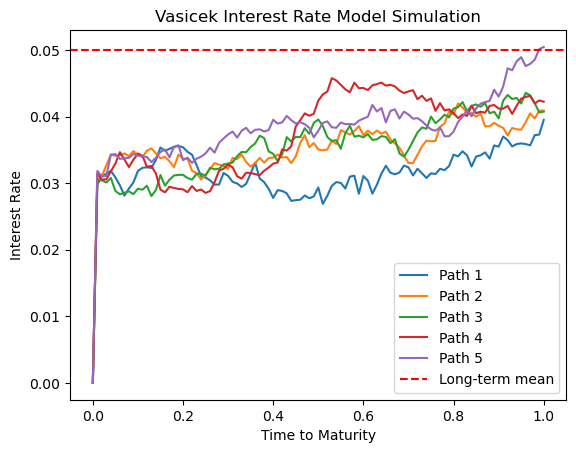

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek Model Parameters
a = 0.1   # speed of mean reversion
b = 0.05  # long-term mean interest rate
sigma = 0.1  # volatility of interest rates

# Simulation Parameters
T = 1.0   # time to maturity
N = 100   # number of time steps
dt = T/N  # time step size
num_paths = 5  # number of simulated paths

# Initialize arrays to store interest rate paths
r_paths = np.zeros((num_paths, N+1))

# Simulate interest rate paths using Euler's method
for i in range(num_paths):
    r = 0.03  # initial interest rate
    for j in range(N):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process increment
        r = r + a * (b - r) * dt + sigma * np.sqrt(dt) * dW
        r_paths[i, j+1] = r

# Plot the simulated interest rate paths
time_steps = np.linspace(0, T, N+1)
for i in range(num_paths):
    plt.plot(time_steps, r_paths[i, :], label=f'Path {i+1}')

plt.axhline(y=b, color='r', linestyle='--', label='Long-term mean')
plt.title('Vasicek Interest Rate Model Simulation')
plt.xlabel('Time to Maturity')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

In [13]:
#CIR MODEL

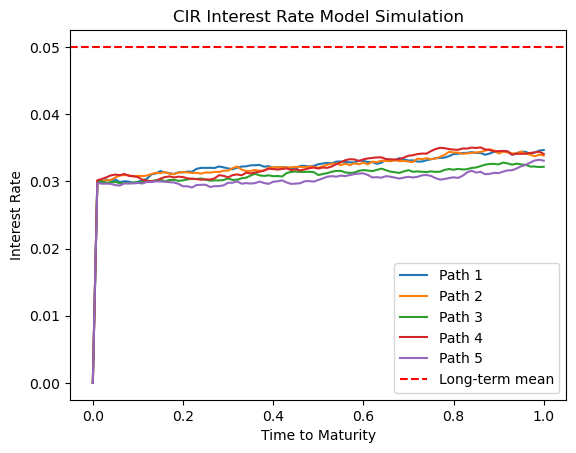

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# CIR Model Parameters
a = 0.1   # speed of mean reversion
b = 0.05  # long-term mean interest rate
sigma = 0.1  # volatility of interest rates

# Simulation Parameters
T = 1.0   # time to maturity
N = 100   # number of time steps
dt = T/N  # time step size
num_paths = 5  # number of simulated paths

# Initialize arrays to store interest rate paths
r_paths = np.zeros((num_paths, N+1))

# Simulate interest rate paths using Euler's method
for i in range(num_paths):
    r = 0.03  # initial interest rate
    for j in range(N):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process increment
        r = r + a * (b - r) * dt + sigma * np.sqrt(r) * np.sqrt(dt) * dW
        r_paths[i, j+1] = r

# Plot the simulated interest rate paths
time_steps = np.linspace(0, T, N+1)
for i in range(num_paths):
    plt.plot(time_steps, r_paths[i, :], label=f'Path {i+1}')

plt.axhline(y=b, color='r', linestyle='--', label='Long-term mean')
plt.title('CIR Interest Rate Model Simulation')
plt.xlabel('Time to Maturity')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

In [15]:
#HULL WHITE MODEL

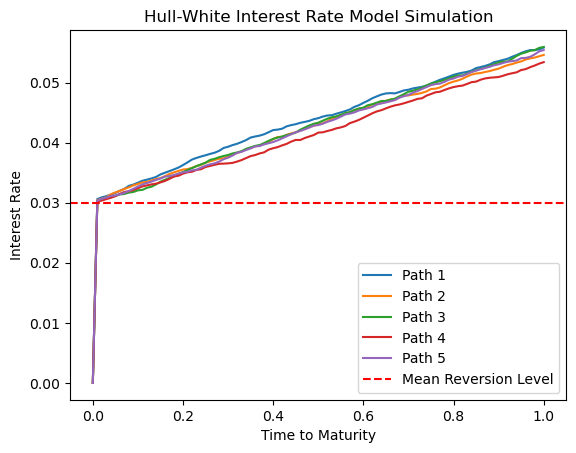

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Hull-White Model Parameters
a = 0.1   # speed of mean reversion
theta = 0.03  # mean reversion level
sigma = 0.01  # constant volatility

# Simulation Parameters
T = 1.0   # time to maturity
N = 100   # number of time steps
dt = T/N  # time step size
num_paths = 5  # number of simulated paths

# Initialize arrays to store interest rate paths
r_paths = np.zeros((num_paths, N+1))

# Simulate interest rate paths using Euler's method
for i in range(num_paths):
    r = 0.03  # initial interest rate
    for j in range(N):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process increment
        theta_t = theta  # In this simple example, assume constant mean reversion level
        sigma_t = sigma  # In this simple example, assume constant volatility
        r = r + (theta_t - a * r) * dt + sigma_t * np.sqrt(dt) * dW
        r_paths[i, j+1] = r

# Plot the simulated interest rate paths
time_steps = np.linspace(0, T, N+1)
for i in range(num_paths):
    plt.plot(time_steps, r_paths[i, :], label=f'Path {i+1}')

plt.axhline(y=theta, color='r', linestyle='--', label='Mean Reversion Level')
plt.title('Hull-White Interest Rate Model Simulation')
plt.xlabel('Time to Maturity')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()